# Load Data（Numeric)

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, classification_report
from typing import Tuple
import warnings
warnings.filterwarnings("ignore")

In [ ]:
crypto_price_base_path = "/content/drive/MyDrive/CS526_DS_Group/Numeric Model/datasets/crypto prices/"
crypto_options = ["BTC", "ETH", "XRP", 'USDT']
def get_crypto_price_path(option, time_range="2021"):
    if option in crypto_options:
        if time_range == "all":
            return crypto_price_base_path + option + ".csv"
        else:
            return crypto_price_base_path + option + f"_{time_range}.csv"
    else:
        raise Exception("Invalid crypto options")

exogenous_data_path = "/content/drive/MyDrive/CS526_DS_Group/Numeric Model/datasets/EXOG_2021.csv" # Exogenous variables for the full year 2021
crypto_price_path = get_crypto_price_path("BTC", time_range="2021")

In [ ]:
# Load Data
data = pd.read_csv(exogenous_data_path, index_col='date', parse_dates=True)
price = pd.read_csv(crypto_price_path, index_col='date', parse_dates=True)

train_size = 0.8
train_data_days = int(365 * train_size)
btc_price = price['close']
btc_price_train, btc_price_test = btc_price[:train_data_days], btc_price[train_data_days:]
exogenous_data = data[['TEU-ENG', 'fng_value']]  # Other exogenous variables
exogenous_data_train, exogenous_data_test = exogenous_data[:train_data_days], exogenous_data[train_data_days:]

In [ ]:
# # ADF Test: check a time series data is stationary or not
# def check_stationarity(series):
#     result = adfuller(series)
#     print(f'ADF Statistic: {result[0]}')
#     print(f'p-value: {result[1]}')
#     if result[1] < 0.05:
#         print("data is stationary")
#     else:
#         print("data is non-stationary，differencing is required")

# def plot_acf_pacf(series):
#     plt.figure(figsize=(12, 6))
#     plt.subplot(121)
#     plot_acf(series, lags=40, ax=plt.gca())  # ACF graph
#     plt.subplot(122)
#     plot_pacf(series, lags=40, ax=plt.gca())  # PACF graph
#     plt.show()
#     print("-" * 120) # separator

# # use BIC to determine p and q
# def select_best_armax_order(series, exog, max_p=5, max_q=5):
#     best_bic = np.inf
#     best_order = None
#     for p in range(0, max_p+1):
#         for q in range(0, max_q+1):
#             try:
#                 model = ARIMA(series, order=(p, 0, q), exog=exog)  # use stationary data
#                 results = model.fit()
#                 bic = results.bic  # get BIC value
#                 print(f"bic with p={p} and q={q}: {bic}")
#                 if bic < best_bic:
#                     best_bic = bic
#                     best_order = (p, q)
#             except Exception as e:
#                 # Print error message for debugging
#                 print(f"Failed for p={p}, q={q}: {e}")
#                 continue

#     return best_order

In [ ]:
btc_price_train.head()

,close
date,
2021-01-01,29340.4
2021-01-02,32198.7
2021-01-03,33148.1
2021-01-04,31387.0
2021-01-05,34310.4


In [ ]:
exogenous_data_train.head()

,TEU-ENG,fng_value
date,,
2021-01-01,110.255460,94
2021-01-02,163.716142,94
2021-01-03,202.245936,93
2021-01-04,150.834486,94
2021-01-05,148.794724,93


In [ ]:
# df = pd.concat([btc_price, exogenous_data], axis=1).dropna()


In [ ]:
# print(df.head())
# print(df.tail())
# print(df.shape)


In [ ]:
# print("check data is stationary or not:")
# check_stationarity(btc_price_train)  # check original data is stationary or not
# plot_acf_pacf(btc_price_train)

# # check first-order difference data is stationary or not
# btc_price_diff = btc_price_train.diff().dropna()
# print("check first-order difference data is stationary or not")
# check_stationarity(btc_price_diff)
# plot_acf_pacf(btc_price_diff)

# # btc_price_diff_2 = btc_price_diff.diff().dropna()
# # print("check second-order difference data is stationary or not")
# # check_stationarity(btc_price_diff_2)
# # plot_acf_pacf(btc_price_diff_2)

In [ ]:
# # find optimal (p, q)
# best_order = select_best_armax_order(btc_price_diff, exogenous_data_train[1:])
# print(f"best_order: {best_order}")

In [ ]:
# p, q = best_order
# d = 1
# model = ARIMA(btc_price_train, order=(p, d, q), exog=exogenous_data_train).fit()
# pred = model.predict(start=0, end=len(btc_price_train)-1, typ='levels')
# true_dir = (btc_price_train.diff() > 0).astype(int)
# pred_dir = (pred.diff() > 0).astype(int)
# print(f"Eval on train data: (p, d, q) = ({p}, {d}, {q})")
# print(f"rmse: {np.sqrt(mean_squared_error(btc_price_train, pred))}")
# print(classification_report(true_dir, pred_dir, target_names=["Down", "Up"]))

# plt.figure(figsize=(12, 6))
# plt.plot(btc_price_train.index, btc_price_train.values, label='real value')
# plt.plot(pred.index, pred.values, label='pred value', linewidth=2)
# plt.xlabel('date')
# plt.ylabel('price')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
def forecast_result(step: int, best_order: Tuple[int, int], d: int, price_data, exogenous_data, test_size: float, coin: str, calculate_returns=False, showPlot=False):
    p, q = best_order
    print(f"p: {p}, d: {d}, q: {q}")
    n = len(price_data)
    trainset_size = int(n * test_size)
    test_price = price_data[trainset_size:]

    pred_list = [] # store prediction results

    # prediction
    assert trainset_size + step <= n
    try:
        for t in range(trainset_size, n, step):
            step_eff = min(step, n - t)   # dynamic step
            x_train   = price_data.iloc[t - trainset_size:t]
            exog_train = exogenous_data.iloc[t - trainset_size:t]

            if calculate_returns == True:
                x_train = np.log(x_train).diff().dropna()
                exog_train = exog_train.shift(1).dropna()

            # fit ARMAX model
            model = ARIMA(x_train, order=(p, d, q), exog=exog_train,enforce_stationarity=False,
                enforce_invertibility=False).fit()

            # assume exogenous data to keep the same with the last data of training
            # to handle unknown future exogenous data
            last_exog = exog_train.iloc[[-1]].values
            future_index = price_data.index[t:t + step_eff]
            exog_fore = pd.DataFrame(
                np.repeat(last_exog, step_eff, axis=0),
                index=future_index,
                columns=exog_train.columns
            )

            # predict
            yhat = model.forecast(steps=step_eff, exog=exog_fore)

            if calculate_returns == True:
                P_start = price_data.iloc[t - 1]
                yhat = P_start * np.exp(yhat.clip(lower=-0.2, upper=0.2).cumsum())

            # add to prediction resutls
            pred_list.append(pd.Series(yhat.values, index=future_index))

        pred_series = pd.concat(pred_list).sort_index().rename('pred') # prediction results
        true_series = test_price
        rmse = np.sqrt(((true_series - pred_series) ** 2).mean())
        print(f"RMSE: {rmse:.6f}")

        true_dir = (test_price.diff().dropna() > 0).astype(int)
        pred_dir = (pred_series.diff().dropna() > 0).astype(int)
        print(classification_report(true_dir, pred_dir, target_names=["Down", "Up"]))

        # Visualization
        if showPlot:
            plt.figure(figsize=(12, 6))
            # plt.plot(price_data.index, price_data.values, label='real value')
            plt.plot(true_series.index, true_series.values, label='real value')
            plt.plot(pred_series.index, pred_series.values, label='pred value', linewidth=2)
            plt.title(f'ARIMAX price prediction on {coin} (training data size={trainset_size}, {step} day rolling origin, (p,d,q)=({p},{d},{q}), returns={calculate_returns})')
            plt.xlabel('date')
            plt.ylabel('price')
            plt.legend()
            plt.tight_layout()
            plt.show()
        return pred_series, true_series # Modified here, return prediction results
    except Exception as e:
        print(f"order ({p}, {d}, {q}) failed, {e}")


#Load data（Text)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:

text_df = pd.read_parquet("/content/drive/MyDrive/CS526_DS_Group/Text Model/text_dataset/data.parquet")
X = text_df.iloc[:,:-1]
y = text_df.iloc[:,-1]

print(X.shape)
print(y.shape)

(1066, 1026)
(1066,)


In [ ]:
# #train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
# # Normalization
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# # ===============================
# # Step 5: Prepare Sliding Windows
# # ===============================
# window_size = 7
# X_train_formatted = []
# y_train_formatted = []
# for i in range(window_size, X_train.shape[0]):
#     X_train_formatted.append(X_train_scaled[i-window_size:i])  # sentiment, post_count, text of the past 7 days
#     y_train_formatted.append(y_train[i])  # Rise/Fall on day i
# X_train_formatted = np.array(X_train_formatted)
# y_train_formatted = np.array(y_train_formatted)

# X_test_formatted = []
# y_test_formatted = []
# for i in range(window_size, X_test.shape[0]):
#     X_test_formatted.append(X_test_scaled[i-window_size:i])
#     y_test_formatted.append(y_test[i])
# X_test_formatted = np.array(X_test_formatted)
# y_test_formatted = np.array(y_test_formatted)
# # shape = (samples, timesteps=7, features>1)
# print("X_train shape:", X_train_formatted.shape)
# print("y_train shape:", y_train_formatted.shape)
# print("X_test shape:", X_test_formatted.shape)
# print("y_test shape:", y_test_formatted.shape)



# Hybrid

Keep only 2021 and align date (solve missing & inconsistency problems)

In [ ]:
# Unify to DatetimeIndex
btc_price.index     = pd.to_datetime(btc_price.index)
exogenous_data.index = pd.to_datetime(exogenous_data.index)
text_df.index       = pd.to_datetime(text_df.index)

# If data contains more than 2021, slice it again to be safe
btc_price_2021 = btc_price.loc['2021-01-01':'2021-12-31']
exog_2021      = exogenous_data.loc['2021-01-01':'2021-12-31']
text_2021      = text_df.loc['2021-01-01':'2021-12-31']

# Get the intersection dates of the three (for hybrid, must ensure all three sides have data)
common_dates = btc_price_2021.index
common_dates = common_dates.intersection(exog_2021.index)
common_dates = common_dates.intersection(text_2021.index)

btc_price_2021 = btc_price_2021.loc[common_dates]
exog_2021      = exog_2021.loc[common_dates]
text_2021      = text_2021.loc[common_dates]

# Handling missing values in rows (NaN in Text embedding)
# Here I fill with 0, you can also fill sentiment with 0, embedding with 0 or mean
text_2021 = text_2021.fillna(0.0)


## Numeric Forcast

p: 2, d: 0, q: 4
RMSE: 3228.444681
              precision    recall  f1-score   support

        Down       0.58      0.53      0.55        40
          Up       0.47      0.53      0.50        32

    accuracy                           0.53        72
   macro avg       0.53      0.53      0.53        72
weighted avg       0.53      0.53      0.53        72



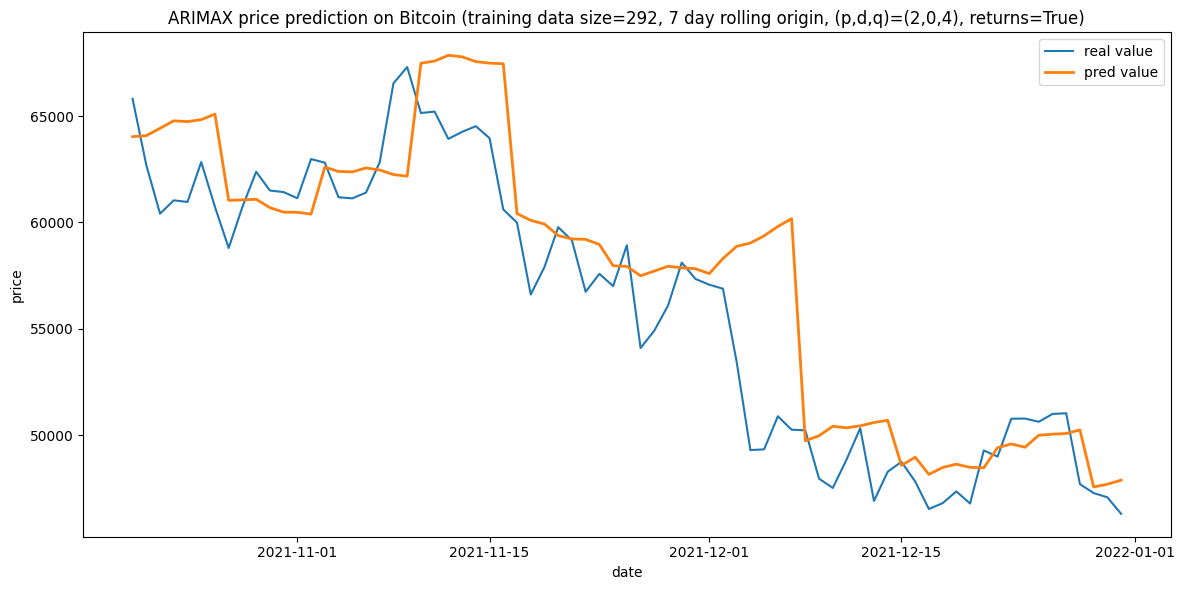

In [ ]:
pred_series, true_series = forecast_result(
    step=7,
    best_order=(2, 4),
    d=0,
    price_data=btc_price,          # Use the 2021 data just aligned
    exogenous_data=exogenous_data,
    test_size=0.8,
    coin="Bitcoin",
    calculate_returns=True,
    showPlot=True
)

# Keep only dates aligned with text (prevent dates not predicted by ARIMAX)
pred_series = pred_series.reindex(common_dates)

# Calculate direction (Rise=1, Fall=0)
num_dir = (pred_series.diff() > 0).astype(int)

# # Map to a "pseudo-probability": Rise -> 0.7, Fall -> 0.3
# p_num_series = num_dir.replace({0: 0.3, 1: 0.7})

# ------------------------------------------------------
# 1) Calculate ARIMAX predicted return (log-return)
# ------------------------------------------------------
# pred_series: ARIMAX predicted price (by date index)
# true_series: Real price

# Predicted log-return (p(t) / p(t-1))
pred_return = np.log(pred_series) - np.log(pred_series.shift(1))

# If NaN (first day), drop it
pred_return = pred_return.dropna()

# ------------------------------------------------------
# 2) Map to 0~1 probability using sigmoid
# ------------------------------------------------------
# Can adjust strength: prob = sigmoid(k * return)
k = 5   # The larger, the more "confident", usually 3~10 is fine
p_num_series = 1 / (1 + np.exp(-k * pred_return))

# Align index back (prevent first NaN)
p_num_series = p_num_series.reindex(pred_series.index).fillna(method="bfill")

##Text - data preprocess

In [ ]:
# window_size = 7

# # Sort all dates chronologically
# dates = text_df.index.sort_values()

# # Extract 1026-dimensional features and label
# text_features = text_df.iloc[:, :-1].astype('float32')   # (T, 1026)
# labels_series = text_df.iloc[:, -1].astype('float32')    # (T,)

# X_list, y_list, target_dates = [], [], []

# for i in range(len(dates) - window_size):
#     # Dates of the past 7 days
#     hist_dates = dates[i:i + window_size]
#     # The 8th day (the day to predict)
#     target_date = dates[i + window_size]

#     # Combine 7 days of features into one sample
#     X_window = text_features.loc[hist_dates].values        # (7, 1026)
#     label = labels_series.loc[target_date]                 # Rise/Fall 0/1 on this day

#     X_list.append(X_window)
#     y_list.append(label)
#     target_dates.append(target_date)

# X_all = np.stack(X_list, axis=0)          # (N, 7, 1026), text features of the past 7 days
# y_all = np.array(y_list, dtype='float32') # (N,), result of the 8th day
# target_dates = pd.DatetimeIndex(target_dates)  # "Prediction day" corresponding to each sample

window_size = 7

# Sort all dates chronologically
dates = text_df.index.sort_values()

# Extract 1026-dimensional features and label
# Structure of text_df:
#   First 1 column: sentiment
#   2nd column: tweet_count
#   3rd~1026th columns: embedding 1024 dimensions
#   Last column: label
text_features = text_df.iloc[:, :-1].astype('float32')   # (T, 1026)
labels_series = text_df.iloc[:, -1].astype('float32')    # (T,)

# =========== Normalization ==========

# 1) Apply log(1+x) to tweet_count
#    tweet_count is the 1st column (index 1)
text_features.iloc[:, 1] = np.log1p(text_features.iloc[:, 1])

# 2) Normalize sentiment + tweet_count
#    sentiment is the 0th column, tweet_count is the 1st column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
text_features.iloc[:, :2] = scaler.fit_transform(text_features.iloc[:, :2])

# embedding (columns 2~1025) remains unchanged

# ====================================

X_list, y_list, target_dates = [], [], []

for i in range(len(dates) - window_size):
    # Dates of the past 7 days
    hist_dates = dates[i:i + window_size]

    # The 8th day (the day to predict)
    target_date = dates[i + window_size]

    # Combine 7 days of features into one sample
    X_window = text_features.loc[hist_dates].values     # (7, 1026)
    label = labels_series.loc[target_date]              # Rise/Fall 0/1 on the 8th day

    X_list.append(X_window)
    y_list.append(label)
    target_dates.append(target_date)

X_all = np.stack(X_list, axis=0)                        # (N, 7, 1026)
y_all = np.array(y_list, dtype='float32')               # (N,)
target_dates = pd.DatetimeIndex(target_dates)           # "Prediction day" corresponding to each sample

Ensure only parts where numeric also has data

In [ ]:
# Get numeric probability for each sample, if ARIMAX didn't predict that day, it will be NaN
p_num_for_samples = p_num_series.reindex(target_dates)

# Keep only samples where numeric also has predictions
mask = ~p_num_for_samples.isna()

X_all = X_all[mask]
y_all = y_all[mask]
target_dates = target_dates[mask]
p_num_for_samples = p_num_for_samples[mask].values.astype('float32')

In [ ]:
N = len(X_all)
split_idx = int(N * train_size)

X_train, X_test = X_all[:split_idx], X_all[split_idx:]
y_train, y_test = y_all[:split_idx], y_all[split_idx:]
p_num_train, p_num_test = p_num_for_samples[:split_idx], p_num_for_samples[split_idx:]


##Text-LSTM

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, classification_report

# Make sure labels are float (0 or 1)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
y_test_t  = torch.tensor(y_test, dtype=torch.float32)

# Features: (N, 7, 1026)
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t  = torch.tensor(X_test, dtype=torch.float32)

# Build TensorDatasets
train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset  = TensorDataset(X_test_t, y_test_t)

# DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cpu


In [ ]:
class TextLSTM(nn.Module):
    def __init__(self, input_dim=1026, hidden_dim=256, num_layers=1, dropout=0.0):
        super(TextLSTM, self).__init__()
        # LSTM layer
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0,
        )
        # Fully connected layer for classification
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        """
        x: (batch_size, seq_len=7, input_dim=1026)
        """
        # out: (batch_size, seq_len, hidden_dim)
        # (h_n, c_n): each is (num_layers, batch_size, hidden_dim)
        out, (h_n, c_n) = self.lstm(x)

        # Use the last layer's hidden state as sequence representation
        h_last = h_n[-1]              # (batch_size, hidden_dim)

        # Logit for binary classification
        logit = self.fc(h_last).squeeze(-1)  # (batch_size,)
        return logit, h_last                 # return h_last for possible later fusion


In [ ]:
# Instantiate model
input_dim = 1026
hidden_dim = 256
num_layers = 1
dropout = 0.0

text_model = TextLSTM(input_dim=input_dim,
                 hidden_dim=hidden_dim,
                 num_layers=num_layers,
                 dropout=dropout).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(text_model.parameters(), lr=1e-3)
num_epochs = 20

for epoch in range(1, num_epochs + 1):
    text_model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)              # (B, 7, 1026)
        y_batch = y_batch.to(device)              # (B,)

        optimizer.zero_grad()

        # Forward pass
        logits, _ = text_model(X_batch)                # (B,)
        loss = criterion(logits, y_batch)

        # Backward & update
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    # simple evaluation on train set
    text_model.eval()
    with torch.no_grad():
        all_logits = []
        all_labels = []
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            logits, _ = text_model(X_batch)
            all_logits.append(logits.cpu())
            all_labels.append(y_batch.cpu())

        all_logits = torch.cat(all_logits)
        all_labels = torch.cat(all_labels)

        probs = torch.sigmoid(all_logits)
        preds = (probs >= 0.5).float()
        train_acc = accuracy_score(all_labels.numpy(), preds.numpy())

    print(f"Epoch [{epoch}/{num_epochs}]  "
          f"Loss: {epoch_loss:.4f}  Train Acc: {train_acc:.4f}")


Epoch [1/20]  Loss: 0.6953  Train Acc: 0.5236
Epoch [2/20]  Loss: 0.6885  Train Acc: 0.6036
Epoch [3/20]  Loss: 0.6873  Train Acc: 0.5818
Epoch [4/20]  Loss: 0.6835  Train Acc: 0.6436
Epoch [5/20]  Loss: 0.6773  Train Acc: 0.5818
Epoch [6/20]  Loss: 0.6729  Train Acc: 0.6000
Epoch [7/20]  Loss: 0.6624  Train Acc: 0.6327
Epoch [8/20]  Loss: 0.6520  Train Acc: 0.6000
Epoch [9/20]  Loss: 0.6465  Train Acc: 0.6618
Epoch [10/20]  Loss: 0.6417  Train Acc: 0.7127
Epoch [11/20]  Loss: 0.6178  Train Acc: 0.6545
Epoch [12/20]  Loss: 0.5969  Train Acc: 0.6727
Epoch [13/20]  Loss: 0.5766  Train Acc: 0.6618
Epoch [14/20]  Loss: 0.5578  Train Acc: 0.7018
Epoch [15/20]  Loss: 0.5605  Train Acc: 0.7564
Epoch [16/20]  Loss: 0.5208  Train Acc: 0.8109
Epoch [17/20]  Loss: 0.4891  Train Acc: 0.8145
Epoch [18/20]  Loss: 0.4429  Train Acc: 0.8145
Epoch [19/20]  Loss: 0.4046  Train Acc: 0.8582
Epoch [20/20]  Loss: 0.3665  Train Acc: 0.8400


In [ ]:
text_model.eval()
all_logits = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        logits, _ = text_model(X_batch)
        all_logits.append(logits.cpu())
        all_labels.append(y_batch.cpu())

all_logits = torch.cat(all_logits)
all_labels = torch.cat(all_labels)

probs = torch.sigmoid(all_logits)               # (N_test,)
preds = (probs >= 0.5).int()                    # 0/1

test_acc = accuracy_score(all_labels.numpy(), preds.numpy())
print("Test Accuracy:", test_acc)
print(classification_report(all_labels.numpy(), preds.numpy(),
                            target_names=["Down", "Up"]))


Test Accuracy: 0.5072463768115942
              precision    recall  f1-score   support

        Down       0.54      0.79      0.64        38
          Up       0.38      0.16      0.23        31

    accuracy                           0.51        69
   macro avg       0.46      0.48      0.43        69
weighted avg       0.47      0.51      0.45        69



## Individual Performance (Reference)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Convert p_num_train/p_num_test to 0/1 using 0.5 threshold
pred_num_train = (p_num_train >= 0.5).astype(int)
pred_num_test  = (p_num_test  >= 0.5).astype(int)

print("Numeric-only train acc:", accuracy_score(y_train, pred_num_train))
print("Numeric-only test  acc:", accuracy_score(y_test,  pred_num_test))
print(classification_report(y_test, pred_num_test, target_names=["Down","Up"]))

Numeric-only train acc: 0.52
Numeric-only test  acc: 0.5362318840579711
              precision    recall  f1-score   support

        Down       0.58      0.55      0.57        38
          Up       0.48      0.52      0.50        31

    accuracy                           0.54        69
   macro avg       0.53      0.53      0.53        69
weighted avg       0.54      0.54      0.54        69



## Two models：GateNet & FusionNet (apply attention on the result of numeric model and Text model)

In [ ]:
# class GateNet(nn.Module):
#     def __init__(self, hidden_dim=256):
#         super(GateNet, self).__init__()
#         self.fc1 = nn.Linear(hidden_dim, 64)
#         self.fc2 = nn.Linear(64, 1)

#     def forward(self, h_text): ## Change: Introduce p_text and p_num
#         """
#         h_text: (batch_size, hidden_dim)
#         return: alpha in (0,1), shape (batch_size,)
#         """
#         x = torch.relu(self.fc1(h_text))

#         alpha = torch.sigmoid(self.fc2(x)).squeeze(-1)
#         return alpha

In [ ]:
def hybrid_forward(gate_model, h_batch, p_text_batch, p_num_batch):
    # FusionNet: Directly output final probability
    if isinstance(gate_model, FusionNet):
        p_final = gate_model(h_batch, p_text_batch, p_num_batch)
        return p_final

    # GateNet: Calculate alpha first, then convex combination
    elif isinstance(gate_model, GateNet):
        # 1) Calculate alpha
        alpha = gate_model(h_batch,p_text_batch,p_num_batch)               # (B,)

        # 2) Fusion: p_final = alpha * p_num + (1-alpha) * p_text
        p_final = alpha * p_num_batch + (1.0 - alpha) * p_text_batch  # (B,)

        return p_final

    else:
        raise ValueError(f"Unknown gate_model type: {type(gate_model)}")

In [ ]:
## Change: Introduce p_text and p_num
class GateNet(nn.Module):
    def __init__(self, hidden_dim=256):
        super(GateNet, self).__init__()
        # Input dimension = h_text_dim + p_text(1) + p_num(1)
        self.fc1 = nn.Linear(hidden_dim + 2, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, h_text, p_text, p_num):
        """
        h_text: (batch_size, hidden_dim)
        p_text: (batch_size,)  Probability of text branch
        p_num:  (batch_size,)  Probability of numeric branch
        return: alpha in (0,1), shape (batch_size,)
        """
        # Concatenate into a gate input vector
        gate_input = torch.cat(
            [h_text, p_text.unsqueeze(-1), p_num.unsqueeze(-1)],
            dim=1
        )  # (batch_size, hidden_dim + 2)

        x = torch.relu(self.fc1(gate_input))       # (batch_size, 64)
        alpha = torch.sigmoid(self.fc2(x)).squeeze(-1)  # (batch_size,)
        return alpha

In [ ]:
class FusionNet(nn.Module): #FusionNet
    def __init__(self, hidden_dim=256):
        super().__init__()
        self.fc1 = nn.Linear(hidden_dim + 2, 64)   # h_text + p_text + p_num
        self.fc2 = nn.Linear(64, 1)

    def forward(self, h_text, p_text, p_num):
        # p_text, p_num shape: (batch,)
        x = torch.cat([
            h_text,
            p_text.unsqueeze(-1),
            p_num.unsqueeze(-1),
        ], dim=1)                         # (batch, hidden_dim+2)

        x = torch.relu(self.fc1(x))
        logit = self.fc2(x).squeeze(-1)   # (batch,)
        p_final = torch.sigmoid(logit)
        return p_final


In [ ]:
# Convert numpy to tensor
X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)  # (N_train, 7, 1026)
y_train_t = torch.tensor(y_train, dtype=torch.float32).to(device)  # (N_train,)
X_test_t  = torch.tensor(X_test,  dtype=torch.float32).to(device)
y_test_t  = torch.tensor(y_test,  dtype=torch.float32).to(device)

p_num_train_t = torch.tensor(p_num_train, dtype=torch.float32).to(device)
p_num_test_t  = torch.tensor(p_num_test,  dtype=torch.float32).to(device)

# Freeze Text-LSTM parameters (do not update during GateNet training)
text_model.to(device)
for p in text_model.parameters():
    p.requires_grad = False
text_model.eval()

# Get p_text and h_text on train/test using Text-LSTM
with torch.no_grad():
    # train
    logits_train, h_text_train = text_model(X_train_t)   # logits: (N_train,), h_text_train: (N_train, hidden_dim)
    p_text_train_t = torch.sigmoid(logits_train)         # Probability (N_train,)

    # test
    logits_test, h_text_test = text_model(X_test_t)
    p_text_test_t = torch.sigmoid(logits_test)           # Probability (N_test,)

In [ ]:
# Combine the above tensors into GateNet training dataset
train_dataset_gate = TensorDataset(
    h_text_train.detach(),          # (N_train, hidden_dim)
    p_text_train_t.detach(),        # (N_train,)
    p_num_train_t.detach(),         # (N_train,)
    y_train_t.detach()              # (N_train,)
)

test_dataset_gate = TensorDataset(
    h_text_test.detach(),
    p_text_test_t.detach(),
    p_num_test_t.detach(),
    y_test_t.detach()
)

batch_size = 32
train_loader_gate = DataLoader(train_dataset_gate, batch_size=batch_size, shuffle=True)
test_loader_gate  = DataLoader(test_dataset_gate,  batch_size=batch_size, shuffle=False)

### Train GateNet

In [ ]:
hidden_dim = h_text_train.shape[1]
gate_model = GateNet(hidden_dim=hidden_dim).to(device)
#gate_model = FusionNet(hidden_dim=hidden_dim).to(device)

criterion = nn.BCELoss()                 # p_final is already probability, use BCELoss
optimizer = torch.optim.Adam(gate_model.parameters(), lr=1e-3)
num_epochs = 20

In [ ]:
# import matplotlib.pyplot as plt

# # Record loss and acc for each epoch
# loss_history = []
# acc_history  = []

# # Tip: Check the currently used model
# if isinstance(gate_model, FusionNet):
#     print("Using FusionNet")
# elif isinstance(gate_model, GateNet):
#     print("Using GateNet")
# else:
#     print("Unknown gate model type:", type(gate_model))

# for epoch in range(1, num_epochs + 1):
#     gate_model.train()
#     running_loss = 0.0

#     for h_batch, p_text_batch, p_num_batch, y_batch in train_loader_gate:
#         h_batch       = h_batch.to(device)        # (B, hidden_dim)
#         p_text_batch  = p_text_batch.to(device)   # (B,)
#         p_num_batch   = p_num_batch.to(device)    # (B,)
#         y_batch       = y_batch.to(device).float()# (B,)

#         optimizer.zero_grad()

#         # ✨ Unified forward, automatically select logic based on gate_model type
#         p_final = hybrid_forward(gate_model, h_batch, p_text_batch, p_num_batch)

#         loss = criterion(p_final, y_batch)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * h_batch.size(0)

#     epoch_loss = running_loss / len(train_loader_gate.dataset)
#     loss_history.append(epoch_loss)

#     # ===== Evaluate current hybrid accuracy on training set =====
#     gate_model.eval()
#     all_final  = []
#     all_labels = []

#     with torch.no_grad():
#         for h_batch, p_text_batch, p_num_batch, y_batch in train_loader_gate:
#             h_batch      = h_batch.to(device)
#             p_text_batch = p_text_batch.to(device)
#             p_num_batch  = p_num_batch.to(device)
#             y_batch      = y_batch.to(device).float()

#             # Change to unified hybrid_forward
#             p_final = hybrid_forward(gate_model, h_batch, p_text_batch, p_num_batch)

#             all_final.append(p_final.cpu())
#             all_labels.append(y_batch.cpu())

#     all_final  = torch.cat(all_final)   # (N,)
#     all_labels = torch.cat(all_labels)  # (N,)

#     preds_train = (all_final >= 0.5).float()
#     train_acc = accuracy_score(all_labels.numpy(), preds_train.numpy())
#     acc_history.append(train_acc)

#     print(f"Epoch [{epoch}/{num_epochs}]  "
#           f"Loss: {epoch_loss:.4f}  Hybrid Train Acc: {train_acc:.4f}")

# # =========================
# #  Plot LOSS / ACC curves
# # =========================
# epochs = range(1, num_epochs + 1)

# plt.figure(figsize=(12,4))

# plt.subplot(1,2,1)
# plt.plot(epochs, loss_history, marker='o')
# plt.title("Hybrid Training Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.grid(True, alpha=0.3)

# plt.subplot(1,2,2)
# plt.plot(epochs, acc_history, marker='o')
# plt.title("Hybrid Training Accuracy (Train Set)")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.ylim(0, 1)
# plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

Using GateNet
Epoch [1/20]  Train Loss: 0.4453  Train Acc: 0.8400  Val Loss: 0.8113  Val Acc: 0.5072
Epoch [2/20]  Train Loss: 0.3930  Train Acc: 0.8400  Val Loss: 0.8712  Val Acc: 0.5072
Epoch [3/20]  Train Loss: 0.3776  Train Acc: 0.8400  Val Loss: 0.8922  Val Acc: 0.5072
Epoch [4/20]  Train Loss: 0.3741  Train Acc: 0.8400  Val Loss: 0.8978  Val Acc: 0.5072
Epoch [5/20]  Train Loss: 0.3731  Train Acc: 0.8400  Val Loss: 0.8996  Val Acc: 0.5072
Epoch [6/20]  Train Loss: 0.3727  Train Acc: 0.8400  Val Loss: 0.9004  Val Acc: 0.5072
Epoch [7/20]  Train Loss: 0.3726  Train Acc: 0.8400  Val Loss: 0.9008  Val Acc: 0.5072
Epoch [8/20]  Train Loss: 0.3725  Train Acc: 0.8400  Val Loss: 0.9011  Val Acc: 0.5072
Epoch [9/20]  Train Loss: 0.3725  Train Acc: 0.8400  Val Loss: 0.9013  Val Acc: 0.5072
Epoch [10/20]  Train Loss: 0.3724  Train Acc: 0.8400  Val Loss: 0.9014  Val Acc: 0.5072
Epoch [11/20]  Train Loss: 0.3724  Train Acc: 0.8400  Val Loss: 0.9016  Val Acc: 0.5072
Epoch [12/20]  Train Loss: 

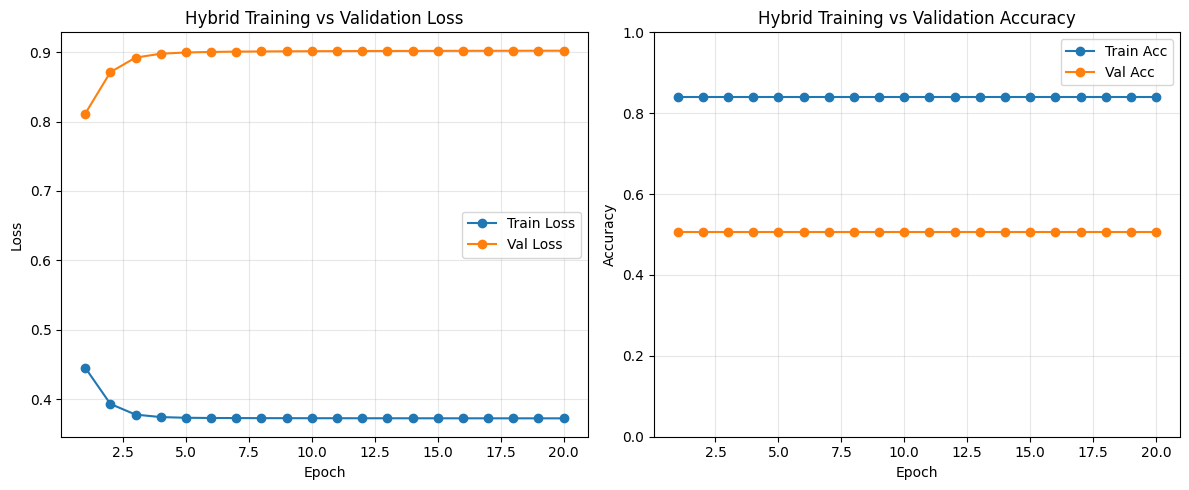

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Record metrics for each epoch
train_loss_history = []
val_loss_history   = []
train_acc_history  = []
val_acc_history    = []

if isinstance(gate_model, FusionNet):
    print("Using FusionNet")
elif isinstance(gate_model, GateNet):
    print("Using GateNet")
else:
    print("Unknown gate model type:", type(gate_model))

for epoch in range(1, num_epochs + 1):
    # =======================
    #       1. Training Phase
    # =======================
    gate_model.train()
    running_loss = 0.0

    for h_batch, p_text_batch, p_num_batch, y_batch in train_loader_gate:
        h_batch       = h_batch.to(device)
        p_text_batch  = p_text_batch.to(device)
        p_num_batch   = p_num_batch.to(device)
        y_batch       = y_batch.to(device).float()

        optimizer.zero_grad()
        p_final = hybrid_forward(gate_model, h_batch, p_text_batch, p_num_batch)
        loss = criterion(p_final, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * h_batch.size(0)

    epoch_train_loss = running_loss / len(train_loader_gate.dataset)
    train_loss_history.append(epoch_train_loss)

    # =======================
    #   2. Evaluate train / val
    # =======================
    gate_model.eval()

    # ---- Evaluate on train ----
    all_final_train  = []
    all_labels_train = []
    with torch.no_grad():
        for h_batch, p_text_batch, p_num_batch, y_batch in train_loader_gate:
            h_batch      = h_batch.to(device)
            p_text_batch = p_text_batch.to(device)
            p_num_batch  = p_num_batch.to(device)
            y_batch      = y_batch.to(device).float()

            p_final = hybrid_forward(gate_model, h_batch, p_text_batch, p_num_batch)

            all_final_train.append(p_final.cpu())
            all_labels_train.append(y_batch.cpu())

    all_final_train  = torch.cat(all_final_train)
    all_labels_train = torch.cat(all_labels_train)
    preds_train = (all_final_train >= 0.5).float()

    train_acc = accuracy_score(all_labels_train.numpy(), preds_train.numpy())
    train_acc_history.append(train_acc)

    # ---- Evaluate on val/test ----
    all_final_val  = []
    all_labels_val = []
    running_val_loss = 0.0

    with torch.no_grad():
        for h_batch, p_text_batch, p_num_batch, y_batch in test_loader_gate:  # Used as validation set here
            h_batch      = h_batch.to(device)
            p_text_batch = p_text_batch.to(device)
            p_num_batch  = p_num_batch.to(device)
            y_batch      = y_batch.to(device).float()

            p_final = hybrid_forward(gate_model, h_batch, p_text_batch, p_num_batch)

            loss_val = criterion(p_final, y_batch)
            running_val_loss += loss_val.item() * h_batch.size(0)

            all_final_val.append(p_final.cpu())
            all_labels_val.append(y_batch.cpu())

    epoch_val_loss = running_val_loss / len(test_loader_gate.dataset)
    val_loss_history.append(epoch_val_loss)

    all_final_val  = torch.cat(all_final_val)
    all_labels_val = torch.cat(all_labels_val)
    preds_val = (all_final_val >= 0.5).float()

    val_acc = accuracy_score(all_labels_val.numpy(), preds_val.numpy())
    val_acc_history.append(val_acc)

    print(f"Epoch [{epoch}/{num_epochs}]  "
          f"Train Loss: {epoch_train_loss:.4f}  Train Acc: {train_acc:.4f}  "
          f"Val Loss: {epoch_val_loss:.4f}  Val Acc: {val_acc:.4f}")

# =========================
#       3. Plot curves
# =========================
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(epochs, train_loss_history, marker='o', label='Train Loss')
plt.plot(epochs, val_loss_history,   marker='o', label='Val Loss')
plt.title("Hybrid Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.3)

# Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, train_acc_history, marker='o', label='Train Acc')
plt.plot(epochs, val_acc_history,   marker='o', label='Val Acc')
plt.title("Hybrid Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Hybrid Test Accuracy: 0.5072463768115942
              precision    recall  f1-score   support

        Down       0.54      0.79      0.64        38
          Up       0.38      0.16      0.23        31

    accuracy                           0.51        69
   macro avg       0.46      0.48      0.43        69
weighted avg       0.47      0.51      0.45        69



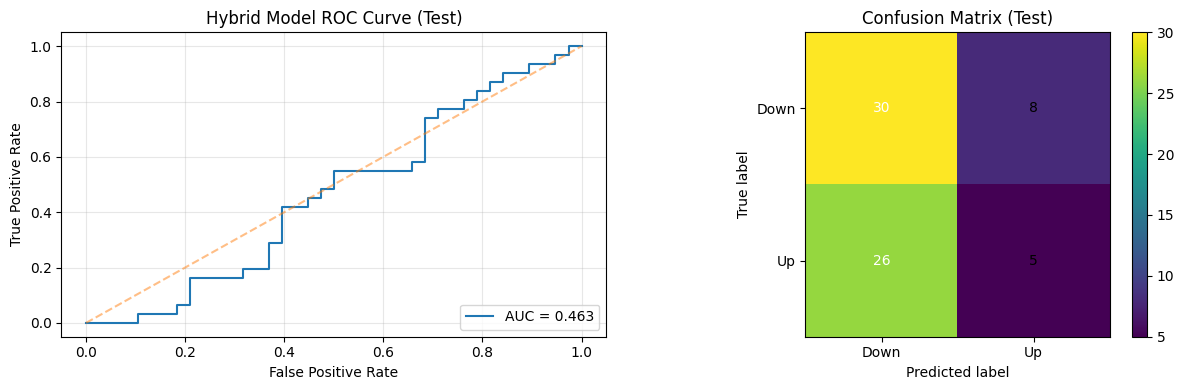

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

gate_model.eval()
all_final  = []
all_labels = []

with torch.no_grad():
    for h_batch, p_text_batch, p_num_batch, y_batch in test_loader_gate:
        h_batch      = h_batch.to(device)
        p_text_batch = p_text_batch.to(device)
        p_num_batch  = p_num_batch.to(device)
        y_batch      = y_batch.to(device).float()

        p_final = hybrid_forward(gate_model, h_batch, p_text_batch, p_num_batch)

        all_final.append(p_final.cpu())
        all_labels.append(y_batch.cpu())

all_final  = torch.cat(all_final)      # (N_test,)
all_labels = torch.cat(all_labels)     # (N_test,)

# Probability -> 0/1 prediction
preds_test = (all_final >= 0.5).int()

# Numerical metrics
test_acc = accuracy_score(all_labels.numpy(), preds_test.numpy())
print("Hybrid Test Accuracy:", test_acc)
print(classification_report(all_labels.numpy(), preds_test.numpy(),
                            target_names=["Down", "Up"]))

# ======================
#       Visualization Part
# ======================

#  ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels.numpy(), all_final.numpy())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "--", alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Hybrid Model ROC Curve (Test)")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

#  Confusion Matrix
cm = confusion_matrix(all_labels.numpy(), preds_test.numpy())

plt.subplot(1,2,2)
im = plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (Test)")
plt.colorbar(im, fraction=0.046, pad=0.04)

classes = ["Down", "Up"]
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Label numbers in grid
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

In [ ]:
gate_model.eval()
with torch.no_grad():
    alpha_train = gate_model(
        h_text_train.to(device),
        p_text_train_t.to(device),
        p_num_train_t.to(device)
    ).cpu().numpy()

    alpha_test = gate_model(
        h_text_test.to(device),
        p_text_test_t.to(device),
        p_num_test_t.to(device)
    ).cpu().numpy()


print("alpha_train mean:", alpha_train.mean())
print("alpha_train std: ", alpha_train.std())
print("alpha_test  mean:", alpha_test.mean())
print("alpha_test  std: ", alpha_test.std())


alpha_train mean: 0.0009340517
alpha_train std:  0.0012735287
alpha_test  mean: 0.00085754617
alpha_test  std:  0.00053875963
